# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [12]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
data = pd.read_csv("../data/absences.csv")

In [4]:
data

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9
5,5,6,58,7
6,6,7,29,14
7,7,8,36,11
8,8,9,64,5
9,9,10,40,8


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

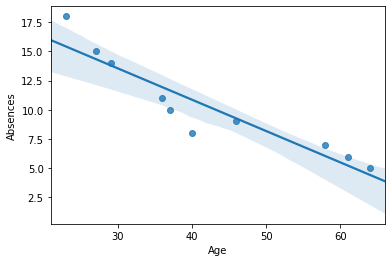

In [11]:
sns.regplot(x="Age", y="Absences", data=data, ci = 95)

In [ ]:
# your comments here: There is a negative correlation

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [29]:
def calculation(x_df, y_df):
    age_mean = np.mean(x_df)
    abse_mean = np.mean(y_df)

    xi_x = np.array([a - age_mean for a in x_df])
    yi_y = np.array([ab - abse_mean for ab in y_df])

    numerator = np.sum(xi_x * yi_y)

    xi_x2 = np.array([(a - age_mean)**2 for a in x_df])
    denominator = np.sum(xi_x2)

    slope = numerator / denominator

    intercept = abse_mean - slope * age_mean

    return slope, intercept

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [30]:
calculation(data["Age"], data["Absences"])

(-0.2681088337033404, 21.58738189891063)

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [49]:
def corr_cov(x_df, y_df):
    age_mean = np.mean(x_df)
    abse_mean = np.mean(y_df)

    xi_x = np.array([a - age_mean for a in x_df])
    yi_y = np.array([ab - abse_mean for ab in y_df])

    correlation = np.sum(xi_x * yi_y) / np.sqrt(np.sum(xi_x**2)*np.sum(yi_y**2))

    covariance = np.sum(xi_x * yi_y) / (len(x_df)-1)
    
    return correlation, covariance

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [50]:
corr_cov(data["Age"], data["Absences"])

(-0.9325434092481012, -57.699999999999996)

I check that it is working:

In [32]:
data["Age"].corr(data["Absences"])

-0.932543409248101

In [33]:
data["Age"].cov(data["Absences"])

-57.69999999999999

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [44]:
# Both parameters confirm that there is a strong correlation between this two variables

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [45]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [46]:
corr_cov(ironbeers_df["X"], ironbeers_df["Y"])

(0.9770084209183943, 12.0)

In [47]:
# They are positively correlated.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

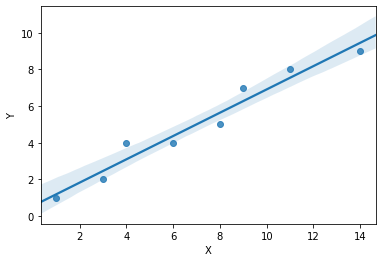

In [48]:
sns.regplot(x="X", y="Y", data=ironbeers_df, ci = 95)

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [52]:
slope, intercept =calculation(ironbeers_df["X"], ironbeers_df["Y"])

In [53]:
slope

0.6363636363636364

In [55]:
intercept

0.5454545454545459

In [60]:
# I check that it is correct

In [56]:
import scipy.stats as stats

In [57]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ironbeers_df["X"],ironbeers_df["Y"])

In [58]:
slope

0.6363636363636364

In [59]:
intercept

0.5454545454545459

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# We are not the reason why people is not staying. The more we say people to stay,the more they stay

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [66]:
expected_Y = [round(slope * x + intercept,2) for x in ironbeers_df["X"]]

In [67]:
expected_Y

[1.18, 2.45, 3.09, 4.36, 5.64, 6.27, 7.55, 9.45]

In [68]:
ironbeers_df["expected_Y"] = expected_Y

In [69]:
ironbeers_df

,X,Y,expected_Y
0,1,1,1.18
1,3,2,2.45
2,4,4,3.09
3,6,4,4.36
4,8,5,5.64
5,9,7,6.27
6,11,8,7.55
7,14,9,9.45


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [71]:
ironbeers_df["error"] = ironbeers_df["expected_Y"]-ironbeers_df["Y"]

In [72]:
ironbeers_df

,X,Y,expected_Y,error
0,1,1,1.18,0.18
1,3,2,2.45,0.45
2,4,4,3.09,-0.91
3,6,4,4.36,0.36
4,8,5,5.64,0.64
5,9,7,6.27,-0.73
6,11,8,7.55,-0.45
7,14,9,9.45,0.45


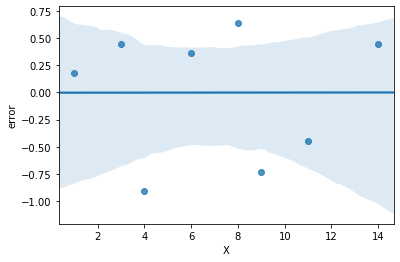

In [76]:
sns.regplot(x="X", y="error", data=ironbeers_df, ci = 95)

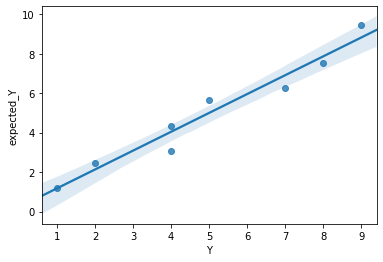

In [74]:
sns.regplot(x="Y", y="expected_Y", data=ironbeers_df, ci = 95)

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [77]:
# There are some that have big errors

#### 4.- Remove the points with a high error and recalculate the regression line.

In [99]:
indexes = []
for i in range(len(ironbeers_df)):
    if ironbeers_df.iloc[i, 3] > 0.5:
        indexes.append(i)
    
    elif ironbeers_df.iloc[i, 3] < -0.5:
        indexes.append(i)

ironbeers_df_new = ironbeers_df.drop(indexes)


In [ ]:
# Pau's way (great): 
# ironbeers_df.drop(ironbeers_df[ironbeers_df.error > 0.5].index, inplace=True)
# ironbeers_df.drop(ironbeers_df[ironbeers_df.error < -0.5].index, inplace=True)

In [100]:
ironbeers_df_new

,X,Y,expected_Y,error
0,1,1,1.18,0.18
1,3,2,2.45,0.45
3,6,4,4.36,0.36
6,11,8,7.55,-0.45
7,14,9,9.45,0.45


In [102]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ironbeers_df_new["X"],ironbeers_df_new["Y"])

In [103]:
slope

0.6525423728813559

In [105]:
intercept

0.23220338983050848

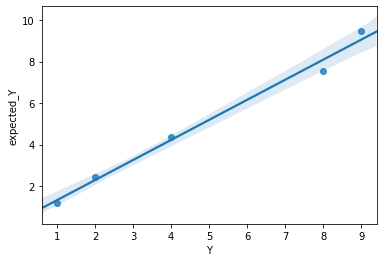

In [106]:
sns.regplot(x="Y", y="expected_Y", data=ironbeers_df_new, ci = 95)

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [107]:
corr_cov(ironbeers_df_new["X"], ironbeers_df_new["Y"])

(0.9945299478460592, 19.25)

In [108]:
# Correlation has increased a lot after the removal of the high-error values.